# MODELO  NO SUPERVISADO 

In [179]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import viridis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [180]:
# Se carga el data set
electrica=pd.read_csv(r'..\\datasets\\electrica.csv')  

In [181]:
# Se verifica el tipo de dato de cada columna
electrica. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     511 non-null    int64  
 1   country                                  511 non-null    object 
 2   per_capita_electricity                   511 non-null    float64
 3   electricity_generation                   511 non-null    float64
 4   biofuel_electricity                      511 non-null    float64
 5   coal_electricity                         511 non-null    float64
 6   fossil_electricity                       511 non-null    float64
 7   gas_electricity                          511 non-null    float64
 8   hydro_electricity                        511 non-null    float64
 9   nuclear_electricity                      511 non-null    float64
 10  oil_electricity                          511 non-n

In [182]:
# Se verifica que no hayan valores nulos
electrica.isna().sum()

year                                       0
country                                    0
per_capita_electricity                     0
electricity_generation                     0
biofuel_electricity                        0
coal_electricity                           0
fossil_electricity                         0
gas_electricity                            0
hydro_electricity                          0
nuclear_electricity                        0
oil_electricity                            0
other_renewable_electricity                0
other_renewable_exc_biofuel_electricity    0
renewables_electricity                     0
solar_electricity                          0
wind_electricity                           0
energy_per_gdp                             0
energy_per_capita                          0
dtype: int64

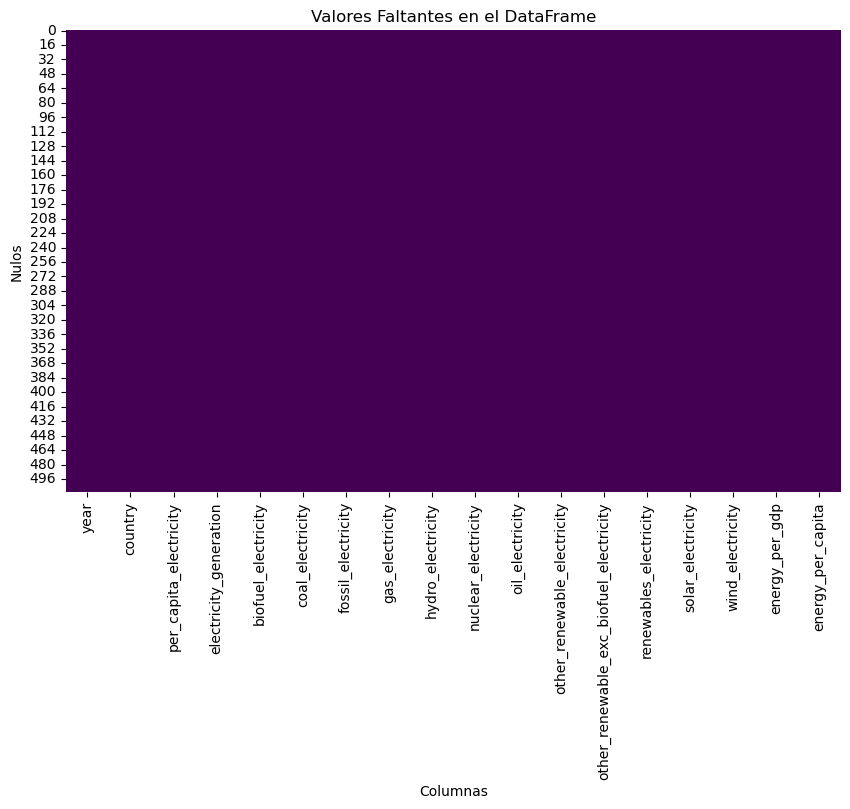

In [183]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(electrica.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Debido a que los países latinos selecionados no poseen información sobre la producción de electricidad proveniente del carbón se eliminará la columna.

In [184]:
# Se realizan códigos para la columna country que posee variables cualitativas
map_gender = {'Argentina': 1, 'Bolivia':2, 'Brazil':3, 'Chile':4, 'Colombia':5, 'Ecuador':6,'French Guiana':7, 'Guyana':8, 'Paraguay':9, 'Peru':10, 'Suriname':11,'Trinidad and Tobago':12, 'Uruguay':13, 'Venezuela':14}
electrica['country'] =electrica['country'].replace(map_gender)

In [185]:
print(electrica.columns)

Index(['year', 'country', 'per_capita_electricity', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity',
       'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp',
       'energy_per_capita'],
      dtype='object')


In [186]:
# Se observan los datos numericos, para proceder a normalizarlos
electrica.describe()

,year,country,per_capita_electricity,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,2001.753425,7.471624,2874.361444,85.445912,5.958861,146.996239,172.160532,17.081706,41.144986,12.915965,8.082613,2.342299,0.023650,47.392714,1.033726,2.871656,1.958937,22197.360654
std,10.548946,4.043232,2425.300516,359.409041,23.361200,807.005258,877.210321,45.640541,98.068798,63.755005,27.830814,9.097475,0.108272,130.671052,11.771834,22.170455,1.836780,28404.635354
min,1984.000000,1.000000,14.485000,0.044000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524000,2484.454000
25%,1993.000000,4.000000,1078.954000,4.335000,0.000000,0.000000,0.247500,0.000000,0.800000,0.000000,0.042000,0.000000,0.000000,0.843000,0.000000,0.000000,1.043000,8817.709000
50%,2002.000000,7.000000,2276.340000,16.929000,0.041000,0.000000,5.281000,1.922000,10.543000,0.000000,0.701000,0.102000,0.000000,11.838000,0.000000,0.000000,1.240000,16044.719000
75%,2011.000000,11.000000,3685.829500,62.564000,0.886000,2.644500,22.465000,11.641500,33.952000,0.000000,4.977000,0.901000,0.000000,36.049000,0.007000,0.020000,1.759500,23163.111000
max,2020.000000,14.000000,9950.967000,7623.696000,129.640000,4631.215000,5044.957000,253.425000,1355.200000,366.200000,160.317000,129.740000,0.610000,2212.540000,261.100000,466.500000,10.055000,176106.743000


In [187]:
#Calcular el rango intercuartílico (IQR)
Q1 = electrica['per_capita_electricity'].quantile(0.25)
Q3 = electrica['per_capita_electricity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = (electrica['per_capita_electricity'] < lower_bound) | (electrica['per_capita_electricity'] > upper_bound)
x = electrica[~outliers]

In [188]:
maximos_por_columna = electrica.max()
# Mostrar los resultados
print("Valores máximos por columna:")
print(maximos_por_columna)

Valores máximos por columna:
year                                         2020.000
country                                        14.000
per_capita_electricity                       9950.967
electricity_generation                       7623.696
biofuel_electricity                           129.640
coal_electricity                             4631.215
fossil_electricity                           5044.957
gas_electricity                               253.425
hydro_electricity                            1355.200
nuclear_electricity                           366.200
oil_electricity                               160.317
other_renewable_electricity                   129.740
other_renewable_exc_biofuel_electricity         0.610
renewables_electricity                       2212.540
solar_electricity                             261.100
wind_electricity                              466.500
energy_per_gdp                                 10.055
energy_per_capita                          176106.743

In [189]:
#Se escalan los datos
p1_scal = (electrica-electrica.min())/(electrica.max()-electrica.min())
p1_scal

,year,country,per_capita_electricity,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita
0,0.000000,0.0,0.353028,0.000039,0.0,0.000000,0.000065,0.000000,0.000000,0.000000,0.002040,0.000000,0.0,0.000007,0.000057,0.000000,0.068723,0.077487
1,0.027778,0.0,0.149434,0.005937,0.0,0.000131,0.003722,0.049182,0.015235,0.015745,0.035592,0.000794,0.0,0.009378,0.000000,0.000000,0.073340,0.073841
2,0.055556,0.0,0.159250,0.006424,0.0,0.000219,0.004396,0.052367,0.015503,0.015595,0.049240,0.000825,0.0,0.009544,0.000000,0.000000,0.076592,0.081460
3,0.083333,0.0,0.166732,0.006830,0.0,0.000219,0.004688,0.049553,0.016116,0.017654,0.062863,0.000832,0.0,0.009920,0.000000,0.000000,0.078271,0.084225
4,0.111111,0.0,0.165378,0.006881,0.0,0.000342,0.006100,0.081109,0.011093,0.015833,0.053862,0.000933,0.0,0.006849,0.000000,0.000000,0.082048,0.084017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.861111,1.0,0.397261,0.015627,0.0,0.000000,0.008910,0.177382,0.054715,0.000000,0.000000,0.000000,0.0,0.033549,0.000027,0.000152,0.143846,0.160911
507,0.888889,1.0,0.351372,0.013722,0.0,0.000000,0.008374,0.166704,0.045992,0.000000,0.000000,0.000000,0.0,0.028206,0.000027,0.000152,0.165040,0.145911
508,0.916667,1.0,0.342819,0.013188,0.0,0.000000,0.008048,0.160209,0.044202,0.000000,0.000000,0.000000,0.0,0.027109,0.000027,0.000152,0.165040,0.141055
509,0.944444,1.0,0.335312,0.012674,0.0,0.000000,0.007734,0.153967,0.042479,0.000000,0.000000,0.000000,0.0,0.026054,0.000023,0.000152,0.165040,0.121609


In [190]:
# Se seleccionan las variables a analizar
x=p1_scal[['energy_per_capita','per_capita_electricity']].values
pd.DataFrame(x).head(5)

,0,1
0,0.077487,0.353028
1,0.073841,0.149434
2,0.081460,0.159250
3,0.084225,0.166732
4,0.084017,0.165378


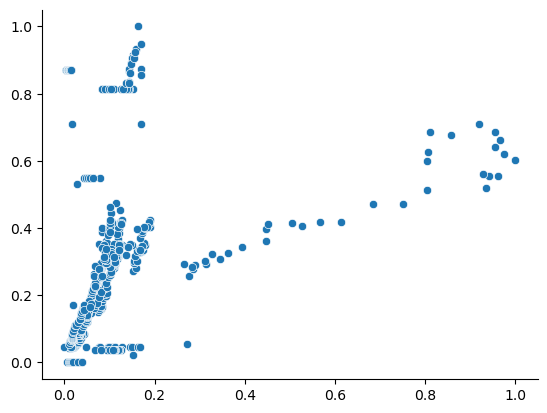

In [226]:
# Se muestra la forma de los datos 
viridis_palette = sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(x=x[:, 0], y=x[:, 1], palette=viridis_palette)
sns.despine()
plt.show()

De acuerdo a la forma el método que se utilizará es Kmeans. Se realizará el agrupamiento de las variables: energía per capita y electricidad per capita para establecer conclusiones.

## Método del codo:
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.



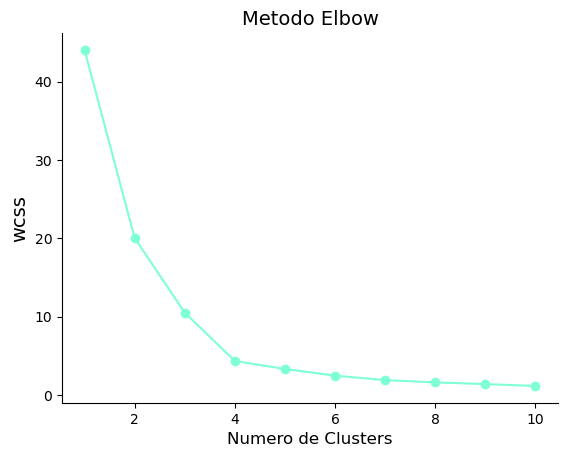

In [216]:
#Se realiza el método del codo para determinar la cantidad de clusters
viridis_palette = sns.color_palette("viridis", as_cmap=True)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o',c="#7FFFD4")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre  2, 3 y 4 que son los puntos en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación. A contnuación se verificarán los tres tipos de números de clusters para determinar cual tiene mejor desempeño.

## Cantidad de clusters: 4

In [193]:
# Se instancia el modelo con el numero de clusters=4
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)
KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [194]:
# Se realizan las etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [195]:
# Se realiza la predicción:
y_means4=kmeansmodel4.fit_predict(x)

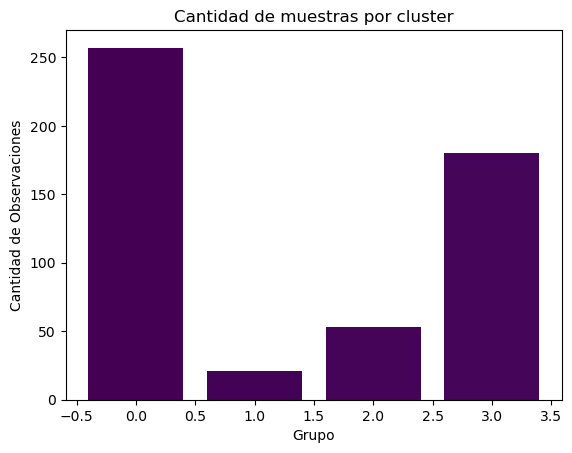

In [222]:
#Se verifica la cantidad de observaciones (4 clusters)
viridis_palette = sns.color_palette( "viridis", as_cmap=True)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = [viridis_palette(i) for i in cluster_labels]
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 4 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [197]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[0.04930555 0.10402464]
 [0.82214632 0.56267498]
 [0.09630187 0.85490496]
 [0.12765471 0.35118556]]


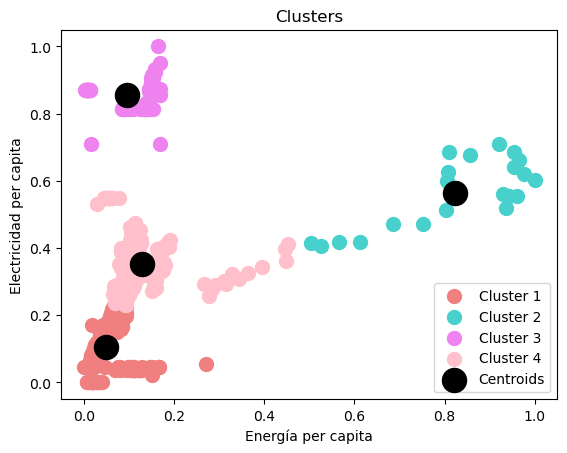

In [224]:
# Se observan los posibles clusters
plt.scatter(x[y_means4 == 0, 0], x[y_means4 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means4== 1, 0], x[y_means4 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means4 == 2, 0], x[y_means4 == 2, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(x[y_means4 == 3, 0], x[y_means4 == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Energía per capita')
plt.ylabel('Electricidad per capita')
plt.legend()
plt.show()


## Cantidad de clusters: 3

In [225]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [200]:
# Se realizan las etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [201]:
# Se realiza la predicción:
y_means3=kmeansmodel3.fit_predict(x)

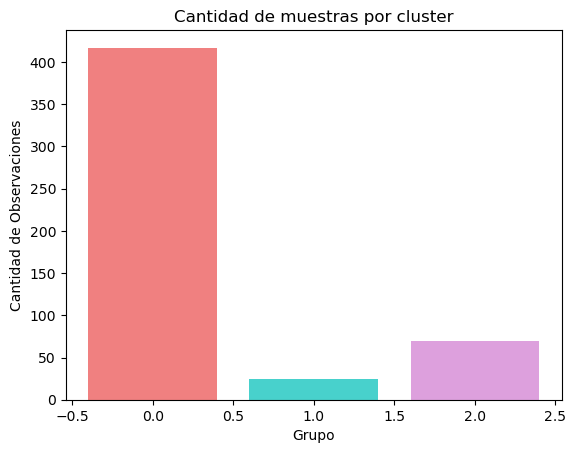

In [202]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [203]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.0800244  0.19051136]
 [0.77546064 0.54107035]
 [0.0862459  0.78064208]]


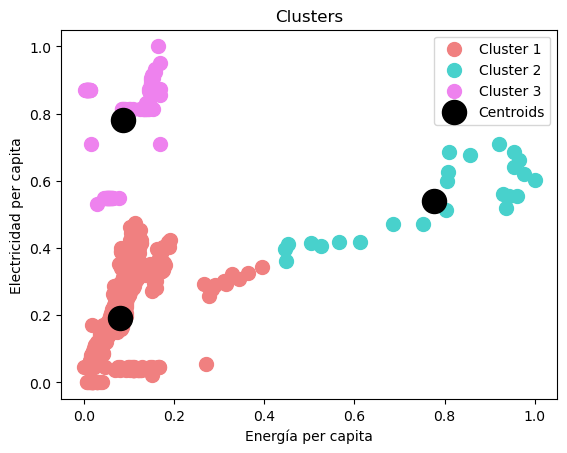

In [213]:
# Se observan los posibles clusters
plt.scatter(x[y_means3 == 0, 0], x[y_means3 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means3 == 1, 0], x[y_means3 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Energía per capita')
plt.ylabel('Electricidad per capita')
plt.legend()
plt.show()

Se puede observar que los paises que tienen mayor cantidad total de consumo de energía dividida por el población del país,en su mayoría posee un alto consumo de energía electrica per capita. Se podría inferir q

## Cantidad de clusters: 2

In [205]:
# Se instancia el modelo con el numero de clusters=2
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)
KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [206]:
# Se realizan las etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [207]:
# Se realiza la predicción:
y_means2=kmeansmodel2.fit_predict(x)

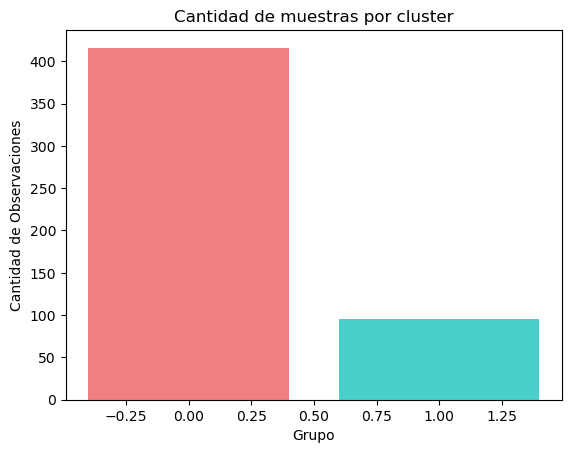

In [208]:
#Se verifica la cantidad de observaciones (2 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 2 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [209]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.07994305 0.18982655]
 [0.26065409 0.71690553]]


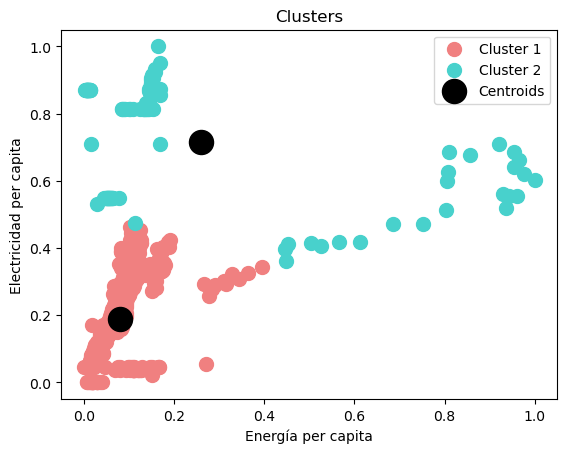

In [214]:
# Se observan los posibles clusters
plt.scatter(x[y_means2 == 0, 0], x[y_means2 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means2 == 1, 0], x[y_means2 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Energía per capita')
plt.ylabel('Electricidad per capita')
plt.legend()
plt.show()

### Método Silhoutte

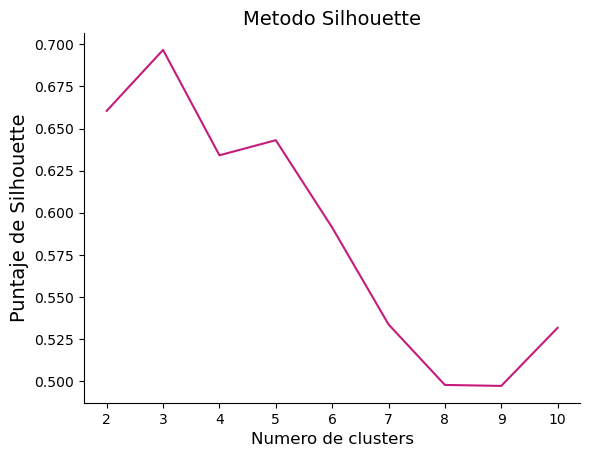

In [211]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

Se puede observar que la cantidad de cluster indicada por el método es 3.  
Se realizará una corrección de los outliers y además se agrgarán datos para equilibrar la cantidad de muestras por clusters para que le método tenga un mejor desempeño.